<font face='Calibri' size='2'> <i>eSBAE - Notebook Series - Part 5a, version 0.1, July 2023. Andreas Vollrath, UN-Food and Agricultural Organization, Rome</i>
</font>

![title](images/header.png)


# Vb - eSBAE Training data selection
### Selecting likely change points by setting thresholds on various change attributes
-------

This notebook takes you through the process of selecting initial training data points with a high likelihood of containing forest cover change points. 

As forest change is a rare event, it is hard to get an initial set of validated points right away. We therefore use the information from the dataset augmentation, where the magnitudes of change from various algorithms indicate a potential change in forest cover. The procedure selects those points with the highest absolute magnitudes according to a threshold set on the percentile. 

It should be noted that the magnitudes outside forest can be quite high due to seasonal variability or other non-forest related land-use/land cover changes. It is therefore recommended to further constrain the selection by setting some loose values on tree height and tree cover. 

The points selected in this procedure will have to be checked by visual interpretation. There is the possibility to save them as csv files that are compatible with 
[Collect Earth Online](https://www.collect.earth/))

**This notebook runs best on an r16 instance**

# --- Beta verision - Under Construction---

![title](images/header.png)


# Vb - eSBAE Training data selection
### Selecting likely change points by setting thresholds on various change attributes
-------

This notebook takes you through the process of selecting initial training data points with a high likelihood of containing forest cover change points. 

As forest change is a rare event, it is hard to get an initial set of validated points right away. We therefore use the information from the dataset agumentation, where the magnitudes of change from various algorithm indicate a potential change in forest cover. The procedure selects those points with the highest absolute magnitudes according to a threshold set on the percentile. 

It should be noted that the magnitudes outside forest can be quite high due to seasonal variability or other non-forest related land-use/land cover changes. It is therefore recommended to further constraint the selection by setting some loose values on tree height and tree cover. 

The points selected in this procedure will have to be checked by visual interpretation. There is the possibility to save them as csv files that are compatible with [Collect Earth Online](https://www.collect.earth/))

**This notebook runs best on a m16 instance**

# 1 - Import libraries

In [1]:
import ee
ee.Initialize()

from sampling_handler import ThresholdSubSampling

/usr/local/share/jupyter/kernels/venv-eSBAE_notebooks/venv/lib/python3.10/site-packages/bfast/__init__.py:10: UserWarning: cupy is not available in this environment, GPU fonctionnalities won't be available
  warn("cupy is not available in this environment, GPU fonctionnalities won't be available")


# 2 - Read time series data

Here we need to point to the dataset augmentation folder, and aggregate the files to a single DataFrame.

In [3]:
esbae = ThresholdSubSampling(
    
    # your project name, as set in previous notebooks
    project_name = 'esbae_project_Jan25',

    # start of calibration period (mainly for bfast)
    percentile = 75,  # absolute value of percentile for each change algorithm's magnitude

    # Actual period of interest, i.e. monitoring period
    tree_cover = 20,  # aditional threshold on tree cover from Hansen 2000 Global Forest Cover, points below this will nto be considered
    tree_height = 5,  # additional threshhold on tree height, points below this will not be considered
    
    # final set of points - if this value is below the total number of points a spatially balanced subselection using the space filling curve is used
    max_points = 150,
    
    # a random state for reproducability
    random_state = 42
)

INFO: Using existing project directory at /home/sepal-user/module_results/esbae/esbae_project_Jan25
INFO: Using existent config file from project directory /home/sepal-user/module_results/esbae/esbae_project_Jan25
INFO: Verifying parameter settings...


### 3 - Extract points

We take all points that are higher than a certain percentile of that feature.

For Bfast, CCDC, Cusum, and EWMA we can further filter for tree cover from the year 2000 (Hanson et al. 2013) and tree height (Potapov et al. 2019) above a certain threshold. 

Trend analysis is only affected by tree height threshold, as it is powerful in detecting gains, so we do not want to filter out non-forested areas from 2000.

In addition, start and end year will be extracted from the configuration file, and change points in Hanson's GFC and JRC's TMF dataset are selected. 

If at the end, too many points fall in the selection, the max_points parameter will define the number of points. Points will be selected using the approach of a space filling curve (i.e. spatially balanced).

In [4]:
training_samples = esbae.extract_training_samples(save_as_ceo=True)

INFO: Loading dataset augmentation
INFO: Filter data
INFO: Number of initial training samples: 74
INFO: Number of final training samples: 74
INFO: Saving final training samples to /home/sepal-user/module_results/esbae/esbae_project_Jan25/05_Subsampling/Threshold


### 4 - Plot points

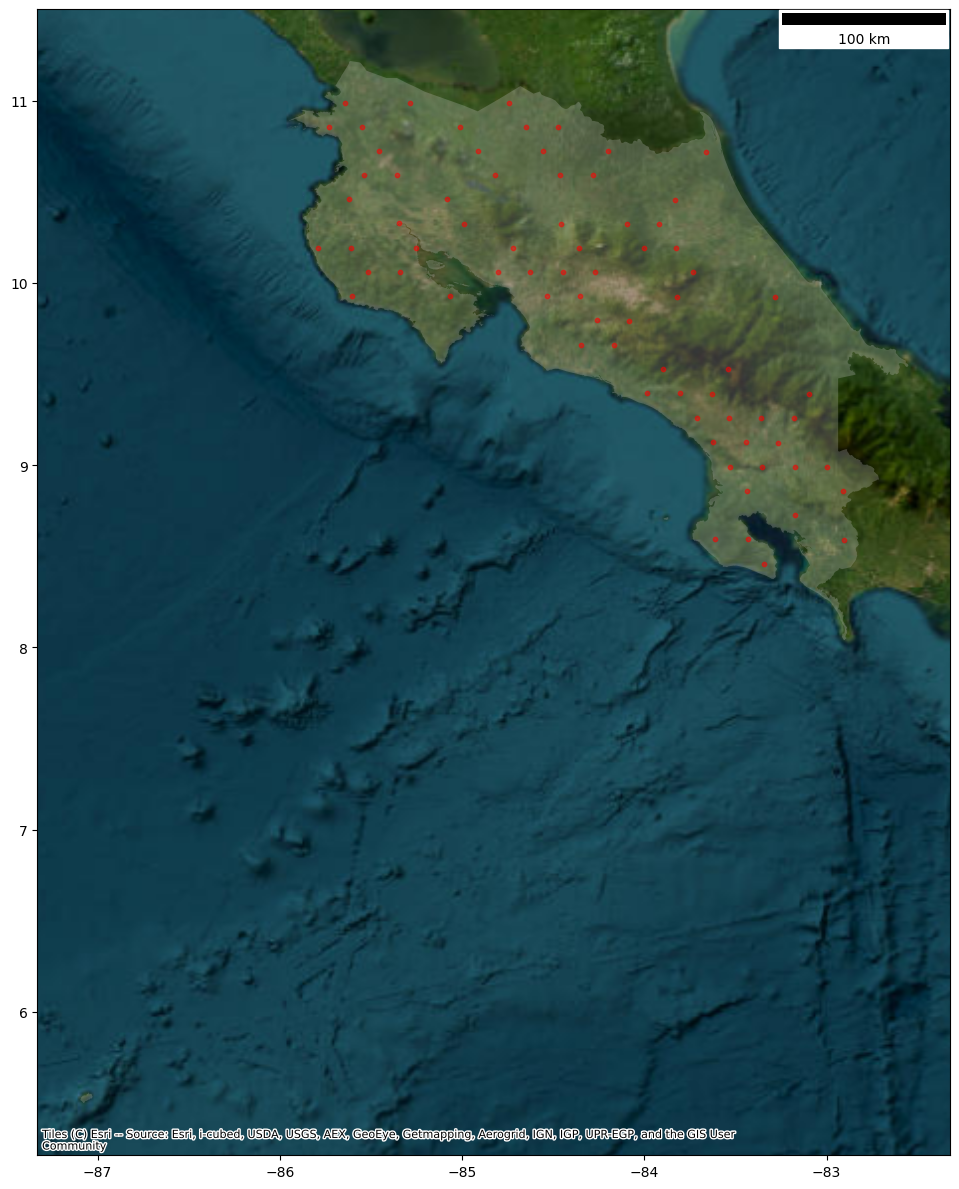

In [5]:
esbae.plot_training_samples(markersize=10)